In [258]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [259]:
df = pd.read_csv('./tutorial_13/income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


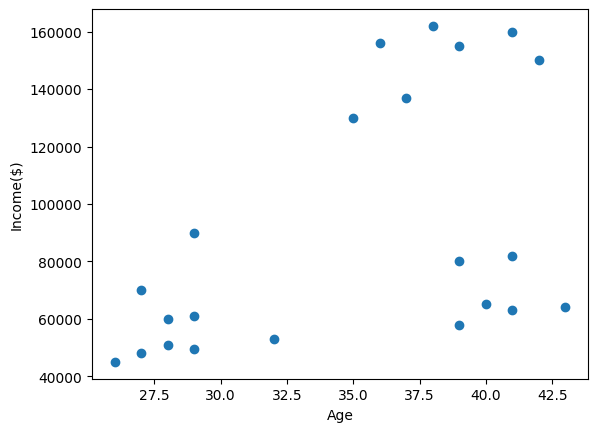

In [260]:
plt.scatter(df['Age'], df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [261]:
km = KMeans(3)
km

KMeans(n_clusters=3)

In [262]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])

In [263]:
y_predicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [264]:
df['cluster'] = y_predicted

In [265]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

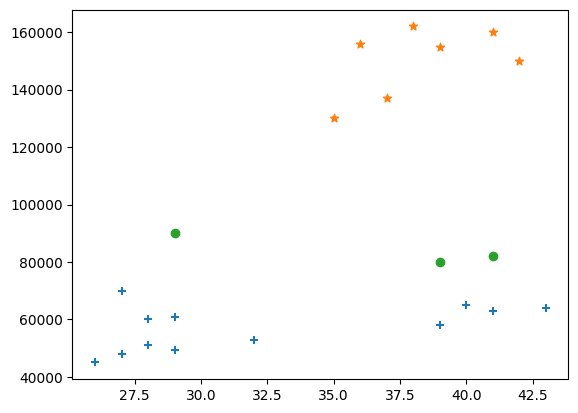

In [266]:
plt.scatter(df1['Age'], df1['Income($)'], marker="+")
plt.scatter(df2['Age'], df2['Income($)'], marker="*")
plt.scatter(df3['Age'], df3['Income($)'])
plt.show()

In [267]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])


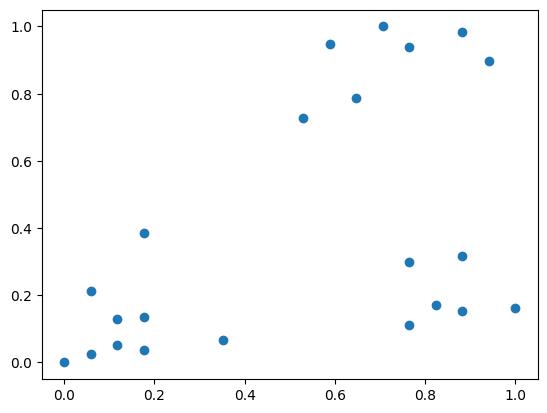

In [268]:
plt.scatter(df['Age'], df['Income($)'])

In [269]:
km = KMeans(3)
y_predicted = km.fit_predict(df[["Age", "Income($)"]])
df["cluster"] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [270]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [271]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

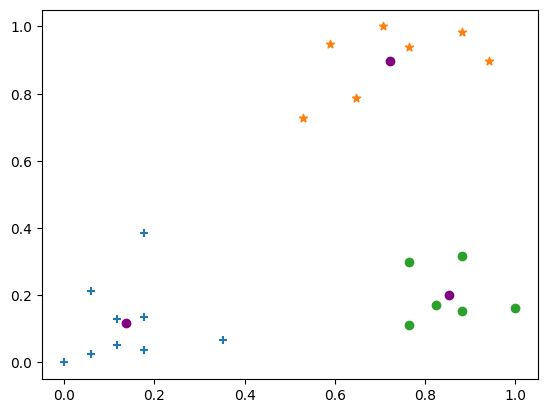

In [272]:
plt.scatter(df1['Age'], df1['Income($)'], marker="+")
plt.scatter(df2['Age'], df2['Income($)'], marker="*")
plt.scatter(df3['Age'], df3['Income($)'])
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color="purple")
plt.show()

In [275]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

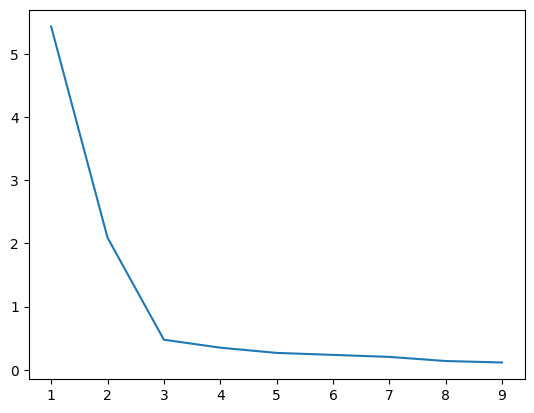

In [276]:
plt.plot(k_rng, sse)